# Airline Safety Visualization Project

# Mary Donovan Martello

## The goal of this project was to effectively tell a story with data to different types of audiences. The topic was to examine airline safety data, determine how safe current airline travel is, and tell the story to an internal data science audience, internal executive audience, and to an external audience via a blog, an infographic, and a presentation.  This notebook includes the code for the blog to an external audiance.

# Task 2:  Blog

In [1]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import squarify    
from collections import defaultdict
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import plotly.express as px
from matplotlib.ticker import ScalarFormatter
from matplotlib.patches import Ellipse
from matplotlib.text import OffsetFrom
from matplotlib.lines import Line2D
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import StrMethodFormatter

# Plotting pretty figures and avoid blurry images
#%config InlineBackend.figure_format = 'retina'
# Larger scale for plots in notebooks
#sns.set_context('talk')

In [2]:
#import data
bill = pd.read_excel('640Calcs.xlsx', sheet_name=5)
depart = pd.read_excel('640Calcs.xlsx', sheet_name=7)
airline = pd.read_excel('air_incidents_byairline.xlsx')
airlineFatY = pd.read_excel('airline-safety_byairline.xlsx')
usWorld = pd.read_excel('640Calcs.xlsx', sheet_name=4)
smSourc = pd.read_excel('640Calcs.xlsx', sheet_name=8)
smFreq = pd.read_excel('640Calcs.xlsx', sheet_name=9)
fatal = pd.read_excel('AirlineFatalsbyYear.xlsx')
rev = pd.read_excel('640Calcs.xlsx', sheet_name=10)
auto2018 = pd.read_excel('640Calcs.xlsx', sheet_name=11)
departRatio = pd.read_excel('640Calcs.xlsx', sheet_name=12)

In [10]:
# set reParams
plt.rcParams.update({
    #"figure.facecolor":  (1.0, 0.0, 0.0, 0.0),  # red   with alpha = 100%
    #"axes.facecolor":    (0.0, 1.0, 0.0, 0.0),  # green with alpha = 100%
    #"savefig.facecolor": (0.0, 0.0, 1.0, 0.0),  # blue  with alpha = 100%
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.labelcolor': 'grey',
    #'axes.titlecolor': 'grey',
    'text.color': 'grey',
    'xtick.color': 'grey',
    'ytick.color': 'grey',
    'axes.edgecolor': 'grey',
    })

In [9]:
bill.head()

,Year,Vehicle Miles,Air Miles
0,2000,152.693848,12.847213
1,2001,150.915594,81.479168
2,2002,150.577731,0.000000
3,2003,148.387543,3.346909
4,2004,144.472175,1.771134


# Auto Fatality Rate Much Higher than Air Fatality Rate

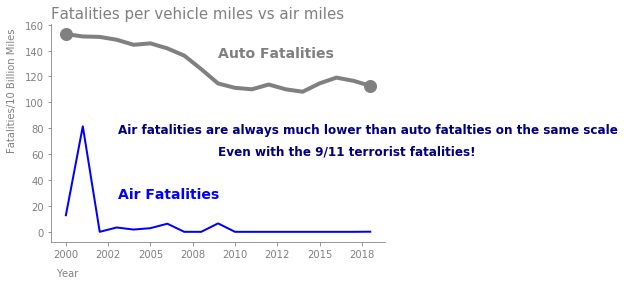

In [55]:
# fatalities per miles traveled
fig, ax = plt.subplots()
ax.text(0.2, 0.2, 'Air Fatalities', transform=ax.transAxes, color='blue', fontsize=14, fontweight='bold')
ax.text(0.5, 0.85, 'Auto Fatalities', transform=ax.transAxes, color='grey', fontsize=14, fontweight='bold')
ax.text(0.2, 0.5, 'Air fatalities are always much lower than auto fatalties on the same scale', transform=ax.transAxes, 
        color='navy', fontsize=12, fontweight='bold')
ax.text(0.5, 0.4, 'Even with the 9/11 terrorist fatalities!', transform=ax.transAxes, color='navy', fontsize=12, fontweight='bold')
ax.plot(bill.Year, bill['Air Miles'], marker='', color='blue', linewidth=2)
#ax.plot(bill.Year, bill['Vehicle Miles'], marker='o', markerfacecolor='grey', markersize=12, color='grey', linewidth=4)
markers_on = [0, 18]
ax.plot(bill.Year, bill['Vehicle Miles'], marker='o', markerfacecolor='grey', markersize=12, markevery=markers_on, 
        color='grey', linewidth=4)
# set details of the graph
ax.set(xlabel='Year', ylabel='Fatalities/10 Billion Miles')
#from matplotlib.ticker import StrMethodFormatter
ax.get_xaxis().set_major_formatter(
    StrMethodFormatter('{x:.0f}'))
ax.yaxis.set_label_coords(-0.1, 0.7)
ax.xaxis.set_label_coords(0.05, -0.12)
ax.set_title('Fatalities per vehicle miles vs air miles', loc='left', fontsize=15)
plt.show()

In [74]:
depart.head()

,Year,Passenger Departures in Millions,Fatalities
0,2013,3143000,265
1,2014,3327000,990
2,2015,3561000,560
3,2016,3810000,325
4,2017,4093000,59


In [78]:
departRatio.head()

,Sixties,Seventies,Eighties,Nineties,Tens
0,350000,750000,1300000,2700000,7900000
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


### Departures without a fatality is drastically increasing

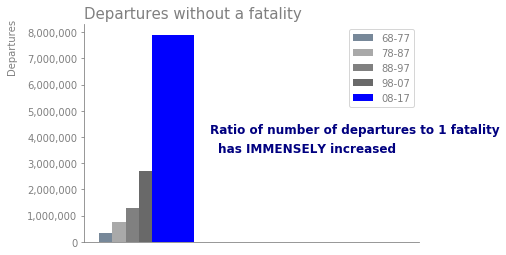

In [112]:
# departures without a fatality
fig, ax = plt.subplots()
# set x axis points
pos = np.arange(0, 5)
# create separate bars
bar1 = plt.bar(pos, departRatio["Sixties"], color='lightslategray')
bar2 = plt.bar(pos+0.25, departRatio["Seventies"], color='darkgray')
bar3 = plt.bar(pos+0.5, departRatio["Eighties"], color='gray')
bar4 = plt.bar(pos+0.75, departRatio["Nineties"], color='dimgray')
bar5 = plt.bar(pos+1.0, departRatio["Tens"], color='blue')


# set details of the graph
ax.get_yaxis().set_major_formatter(
    FuncFormatter(lambda y, p: format(int(y), ',')))
#plt.xticks(pos+0.25, depart['Year'], rotation='horizontal')
plt.ylabel('Departures')
ax.text(0.375, 0.5, 'Ratio of number of departures to 1 fatality', transform=ax.transAxes, 
        color='navy', fontsize=12, fontweight='bold')
ax.text(0.4, 0.41, 'has IMMENSELY increased', transform=ax.transAxes, 
        color='navy', fontsize=12, fontweight='bold')
#plt.title('Departures without a fatality')
ax.legend((bar1, bar2, bar3, bar4, bar5), ('68-77', '78-87', '88-97', '98-07', '08-17'))
#ax.set_xticklabels([])
ax.yaxis.set_label_coords(-0.2, 0.9)
ax.set_title('Departures without a fatality', loc='left', fontsize=15)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

In [115]:
auto2018.head()

,Year,Auto US,Air World,Air US
0,2018,36560,562,1
1,0,0,0,0
2,0,0,0,0


In [114]:
auto2018 = pd.read_excel('640Calcs.xlsx', sheet_name=11)

# Airplane crashes attract attention; auto crashes not so much

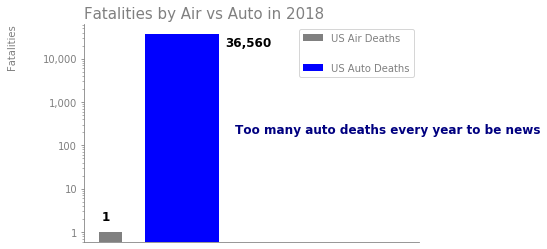

In [138]:
# 2018 fatalities auto vs air
fig, ax = plt.subplots()

# set x axis points
pos = np.arange(0, 3)
# create separate bars
bar1 = plt.bar(pos, auto2018["Air US"], color='grey')
bar2 = plt.bar(pos+0.25, auto2018["Air World"], color='white')
bar3 = plt.bar(pos+0.5, auto2018["Auto US"], color='blue')
plt.yscale('log')
# set details of the graph
ax.get_yaxis().set_major_formatter(
    FuncFormatter(lambda y, p: format(int(y), ',')))
#plt.xticks(pos+0.25, depart['Year'], rotation='horizontal')
plt.ylabel('Fatalities')

ax.text(0.45, 0.5, 'Too many auto deaths every year to be news', transform=ax.transAxes, 
        color='navy', fontsize=12, fontweight='bold')
ax.text(0.0525, 0.1, '1', transform=ax.transAxes, 
        color='black', fontsize=12, fontweight='bold')
ax.text(0.42, 0.9, '36,560', transform=ax.transAxes, 
        color='black', fontsize=12, fontweight='bold')

#plt.title('Departures without a fatality')
ax.legend((bar1, bar2, bar3), ('US Air Deaths', '', 'US Auto Deaths'))
#ax.set_xticklabels([])
ax.yaxis.set_label_coords(-0.2, 0.9)
ax.set_title('Fatalities by Air vs Auto in 2018', loc='left', fontsize=15)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

# Safety increasing as number of departures have been increasing

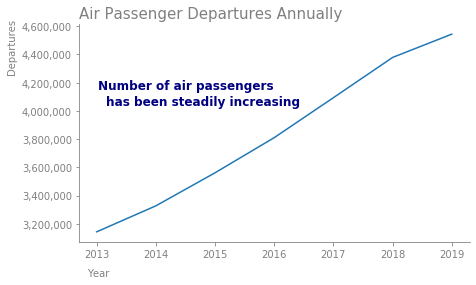

In [233]:
# departures
# set up plot
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(depart['Year'], depart['Passenger Departures in Millions'])
ax.text(0.05, 0.7, 'Number of air passengers', transform=ax.transAxes, 
        color='navy', fontsize=12, fontweight='bold')
ax.text(0.07, 0.63, 'has been steadily increasing', transform=ax.transAxes, 
        color='navy', fontsize=12, fontweight='bold')
# set details of the graph
ax.get_yaxis().set_major_formatter(
    FuncFormatter(lambda y, p: format(int(y), ',')))
ax.yaxis.set_label_coords(-0.158, 0.9)
ax.xaxis.set_label_coords(0.05, -0.12)
ax.set_title('Air Passenger Departures Annually', loc='left', fontsize=15)
ax.set(xlabel='Year', ylabel='Departures')
#ax.grid()
plt.show()

In [178]:
fatal.head()

,Year,Accidents,Fatalities
0,1970,47,1400
1,1971,38,1429
2,1972,56,2432
3,1973,50,2226
4,1974,46,2068


In [179]:
fatal.shape

(51, 3)

In [180]:
fatal.tail()

,Year,Accidents,Fatalities
46,2016,11,288
47,2017,5,31
48,2018,11,542
49,2019,14,267
50,2020,1,176


In [152]:
recent = usWorld.iloc[10:]

In [157]:
recent.head(10)

,Year,US Fatalities,World Fatalities
10,2010,0,943
11,2011,0,525
12,2012,0,478
13,2013,0,265
14,2014,0,990
15,2015,0,560
16,2016,0,325
17,2017,0,59
18,2018,1,562
19,2019,1,287


### US Airline Fatalities

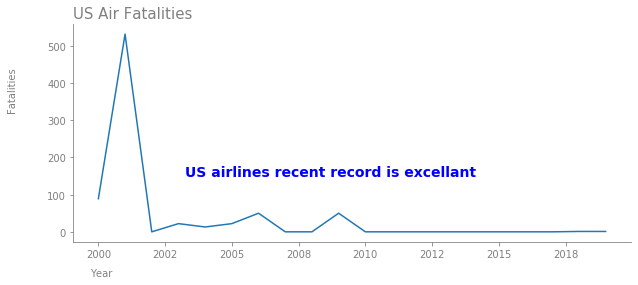

In [160]:
# US air fatalities
# set up plot
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(usWorld.Year, usWorld['US Fatalities'])
ax.text(0.2, 0.3, 'US airlines recent record is excellant', transform=ax.transAxes, color='blue', fontsize=14, fontweight='bold')

# set details of the graph
ax.yaxis.set_label_coords(-0.1, 0.7)
ax.xaxis.set_label_coords(0.05, -0.12)
ax.set_title('US Air Fatalities', loc='left', fontsize=15)
ax.get_xaxis().set_major_formatter(
    StrMethodFormatter('{x:.0f}'))
ax.get_yaxis().set_major_formatter(
    FuncFormatter(lambda y, p: format(int(y), ',')))
ax.set(xlabel='Year', ylabel='Fatalities')

plt.show()

In [98]:
airline.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,aer lingus,320906734,2,0,0,0,0,0
1,aeroflot*,1197672318,76,14,128,6,1,88
2,aerolineas argentinas,385803648,6,0,0,1,0,0
3,aeromexico*,596871813,3,1,64,5,0,0
4,air canada,1865253802,2,0,0,2,0,0


In [106]:
airlineFatY.shape

(24, 8)

### US Airlines Safer than Foreign Airlines

[]

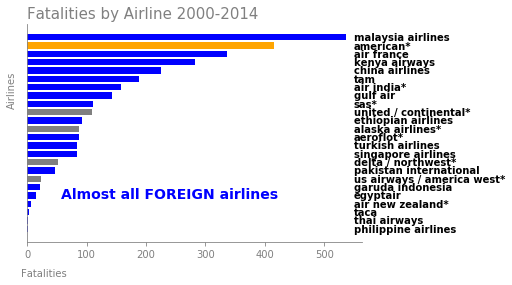

In [194]:
# by airline
fig, ax = plt.subplots()
# set x axis points
pos = np.arange(len(airlineFatY['airline']))
yLab = airlineFatY['airline'].tolist()
y = airlineFatY['airline']
# horizontal bars
plt.barh(pos, airlineFatY['fatalities_00_14'], width, align='center', color=['blue', 'blue', 'blue', 'blue', 'blue', 'blue',
                                                                      'grey', 'blue', 'grey', 'blue', 'blue', 'blue',
                                                                      'grey', 'blue', 'grey', 'blue', 'blue', 'blue', 
                                                                      'blue', 'blue', 'blue', 'blue', 'orange', 'blue'
                                                                     ])
ax.text(0.10, 0.2, 'Almost all FOREIGN airlines', transform=ax.transAxes, color='blue', fontsize=14, fontweight='bold')

# set details of the graph
ax.yaxis.set_label_coords(-0.03, 0.7)
ax.xaxis.set_label_coords(0.05, -0.12)
ax.set_title('Fatalities by Airline 2000-2014', loc='left', fontsize=15)
width = 0.75 # width of the bars
widthPad = 1
#plt.yticks(pos, airlineFatY['airline'], rotation = (0), fontsize = 11, va='bottom', ha='right')

plt.ylabel("Airlines")
plt.xlabel('Fatalities')
_, xmax = plt.xlim()
#plt.xlim(0, xmax+300)
for i, v in enumerate(y):
    ax.text(550, i, v, color='black', fontweight='bold',fontsize=10, ha='left', va='center')
ax.set_yticks([])
# plt.tick_params(
#     axis='y',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False) # labels along the bottom edge are off

In [195]:
usWorld.head()

,Year,US Fatalities,World Fatalities
0,2000,89,1148
1,2001,531,1144
2,2002,0,1112
3,2003,22,705
4,2004,13,552


[Text(0, 0, '2000'),
 Text(0, 0, '2000'),
 Text(0, 0, '2002'),
 Text(0, 0, '2005'),
 Text(0, 0, '2007'),
 Text(0, 0, '2010'),
 Text(0, 0, '2012'),
 Text(0, 0, '2015'),
 Text(0, 0, '2017')]

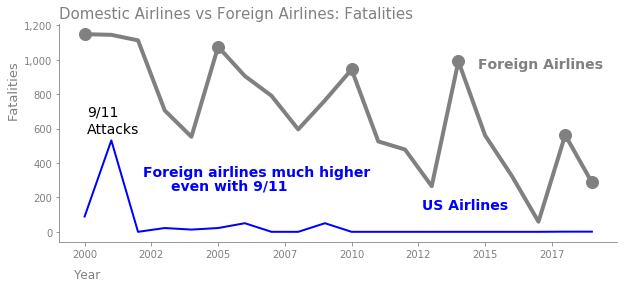

In [231]:
# foregin vs US fatalities
fig, ax = plt.subplots(figsize=(10, 4))
ax.text(0.05, 0.58, '9/11', transform=ax.transAxes, color='black', fontsize=14)
ax.text(0.05, 0.5, 'Attacks', transform=ax.transAxes, color='black', fontsize=14)
ax.text(0.65, 0.15, 'US Airlines', transform=ax.transAxes, color='blue', fontsize=14, fontweight='bold')
ax.text(0.75, 0.8, 'Foreign Airlines', transform=ax.transAxes, color='grey', fontsize=14, fontweight='bold')
ax.text(0.15, 0.3, 'Foreign airlines much higher', transform=ax.transAxes, color='blue', fontsize=14, fontweight='bold')
ax.text(0.2, 0.24, 'even with 9/11', transform=ax.transAxes, color='blue', fontsize=14, fontweight='bold')
ax.plot(usWorld.Year, usWorld['US Fatalities'], marker='', color='blue', linewidth=2)
markers_on = [0, 5, 10, 14, 18, 19]
ax.plot(usWorld.Year, usWorld['World Fatalities'], marker='o', markerfacecolor='grey', markersize=12, markevery=markers_on,
        color='grey', linewidth=4)
# set details of the graph
ax.yaxis.set_label_coords(-0.07, 0.7)
ax.xaxis.set_label_coords(0.05, -0.12)
ax.set_title('Domestic Airlines vs Foreign Airlines: Fatalities', loc='left', fontsize=15)
ax.set_ylabel(ylabel='Fatalities', fontsize=13)
ax.set_xlabel(xlabel='Year', fontsize=12)
ax.get_yaxis().set_major_formatter(
    FuncFormatter(lambda y, p: format(int(y), ',')))
tick_labels = ('2000', '2000', '2002', '2005', '2007', '2010', '2012', '2015', '2017')
ax.set_xticklabels(tick_labels)
#ax.set(xlabel='Year', ylabel='Fatalities')